In [10]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import io 

D:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [11]:
dataset = pd.read_csv('F:/Data_Set/cancer_datasets.csv') 

In [12]:
dataset.head() 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [13]:
dataset.shape 

(569, 33)

#### Divide the data into dependent and independent variables

In [14]:
x = dataset.drop(labels=['id','diagnosis','Unnamed: 32'],axis=1) 
#x = dataset.iloc[:,2:33].values
#print(x) 

In [16]:
y = dataset['diagnosis'] 
#y = dataset.iloc[:,1].values 
#print(y) 

Encoding Categorical data of Y

In [17]:
from sklearn.preprocessing import LabelEncoder 

In [18]:
le = LabelEncoder() 

y =  le.fit_transform(y)

#print(y) 

#### To see the Quantity of Benign and Malignanat graphically

Benign 357
Malignanat 212


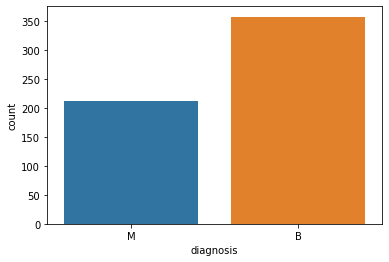

In [29]:
ax = sns.countplot(dataset['diagnosis'],label = 'count')  
B,M = dataset['diagnosis'].value_counts()
print('Benign',B) 
print('Malignanat',M) 

#### Split the dataset into traning and testing dataset

In [19]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0) 

#### Feature scaling

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) 
x_test = scaler.fit_transform(x_test)  

In [21]:
x_train 

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [22]:
x_test 

array([[-0.22609091,  0.14299357, -0.16219992, ...,  1.33438591,
         1.22101459,  1.32977555],
       [-0.28072076,  1.13113906, -0.34954245, ..., -0.81952682,
        -0.77541863, -0.94570364],
       [-0.04782508, -0.87231025, -0.12299829, ..., -0.49120548,
        -1.31433312, -0.98696059],
       ...,
       [ 1.7233322 , -0.06173848,  1.70132185, ...,  1.51554921,
         0.25341812, -0.26496405],
       [ 1.18565945,  0.15552818,  1.16487847, ...,  0.53103066,
         0.32690646, -0.37709831],
       [ 0.24545096, -0.64668718,  0.25416267, ..., -0.19956228,
        -1.2425945 , -0.01424877]])

#### Build ANN Model

In [23]:
from tensorflow import keras
from keras.models import Sequential 
from keras.layers import Dense 

In [24]:
model = Sequential() 

Create First input Layer

In [25]:
model.add(Dense(output_dim=16,init='uniform',activation='relu',input_dim=30)) 

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=30, units=16, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


Adding the Second Layer

In [27]:
model.add(Dense(output_dim=16,init='uniform',activation='relu')) 

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


Adding the Output Layer

In [28]:
model.add(Dense(output_dim = 1,init='uniform',activation='sigmoid')) 

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


#### Compile Our ANN Module

In [29]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy']) 

#### Traning and Testing of Model with epoch

In [30]:
model.fit(x_train,y_train,batch_size=100,nb_epoch=150)  

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/150
455/455 [==============================] - 0s 465us/step - loss: 0.6928 - accuracy: 0.6374
Epoch 2/150
455/455 [==============================] - 0s 40us/step - loss: 0.6920 - accuracy: 0.6374
Epoch 3/150
455/455 [==============================] - 0s 31us/step - loss: 0.6909 - accuracy: 0.6374
Epoch 4/150
455/455 [==============================] - 0s 46us/step - loss: 0.6896 - accuracy: 0.6374
Epoch 5/150
455/455 [==============================] - 0s 40us/step - loss: 0.6874 - accuracy: 0.6374
Epoch 6/150
455/455 [==============================] - 0s 33us/step - loss: 0.6844 - accuracy: 0.6374
Epoch 7/150
455/455 [==============================] - 0s 29us/step - loss: 0.6796 - accuracy: 0.6374
Epoch 8/150
455/455 [==============================] - 0s 35us/step - loss: 0.6725 - accuracy: 0.6374
Epoch 9/150
455/455 [==============================] - 0s 29us/step - loss: 0.6619 - accuracy: 0.6374
Epoch 10/150
455/455 [==============================] - 0s 31us/step - loss: 0.64

In [31]:
print(x_test) 

[[-0.22609091  0.14299357 -0.16219992 ...  1.33438591  1.22101459
   1.32977555]
 [-0.28072076  1.13113906 -0.34954245 ... -0.81952682 -0.77541863
  -0.94570364]
 [-0.04782508 -0.87231025 -0.12299829 ... -0.49120548 -1.31433312
  -0.98696059]
 ...
 [ 1.7233322  -0.06173848  1.70132185 ...  1.51554921  0.25341812
  -0.26496405]
 [ 1.18565945  0.15552818  1.16487847 ...  0.53103066  0.32690646
  -0.37709831]
 [ 0.24545096 -0.64668718  0.25416267 ... -0.19956228 -1.2425945
  -0.01424877]]


#### Predicting the test set result

In [32]:
y_pred = model.predict(x_test) 

y_pred = (y_pred>0.5)

#### Making the Confusion Matrix

In [33]:
from sklearn.metrics import confusion_matrix 

In [34]:
cm = confusion_matrix(y_test,y_pred) 

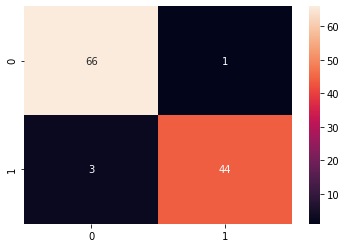

In [35]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [3]:
#First Accuracy after traning
(66+44)/114 

0.9649122807017544

##  14: K-Fold Cross Validation using Keras Python

1. keras classification
2. cross validation score
3. Dence Layer

by using this methods train our model again and check the accuracy 

In [7]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

This following function call in to function and decide the ephocs quantity
1. Classifier
2. Input Hidden layers
3. Compilation of Model

In [41]:
def built_model():
    model = Sequential()
    model.add(Dense(output_dim=16,init='uniform',activation='relu',input_dim=30))
    model.add(Dense(output_dim=16,init='uniform',activation='relu'))
    model.add(Dense(output_dim = 1,init='uniform',activation='sigmoid'))
    model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=built_model,batch_size=100,epochs=100) 
acciracies = cross_val_score(estimator=model,X= x_train, y= y_train,cv=10,n_jobs=-1) 


In [43]:
acciracies

array([1.        , 1.        , 1.        , 0.97826087, 0.95652175,
       0.95555556, 0.97777778, 1.        , 0.97777778, 0.97777778])

In [44]:
acciracies.mean() 

0.9823671519756317

In [45]:
acciracies.std()  #Standard derivation 

0.016463791332592098

In [42]:
mean = acciracies.mean(); 